<a href="https://colab.research.google.com/github/RitvikVankayala/NLP/blob/main/Cipher_decryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Substitution cipher is been implemented here

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# for loading the ascii charecters
import string
# for randomly suffiling the ascii chars and produce a substitution cipher 
import random
# for some string operations
import re
# for some other tasks
import os
import requests
import textwrap

In [18]:
# creating a random substitution cipher

letters1=list(string.ascii_lowercase)
letters2=list(string.ascii_lowercase)

true_mapping={}

random.shuffle(letters2)

for k,v in zip(letters1,letters2):
  true_mapping[k]=v

In [19]:
print(letters1)
print(letters2)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['i', 'e', 'j', 'l', 'z', 'r', 'c', 'g', 'h', 'p', 'w', 'y', 'v', 't', 'u', 'd', 's', 'q', 'f', 'n', 'o', 'b', 'm', 'k', 'x', 'a']


In [20]:
# generating a language model that can decrypt the given code

# state transition matrix

M=np.ones((26,26))
pi=np.zeros(26)

# function for updating the markov matrix
def update_transition(ch1,ch2):

  i=ord(ch1)-97
  j=ord(ch2)-97
  M[i,j]+=1

# function for updating the pi
def update_pi(ch1):
  i=ord(ch1)-97
  pi[i]+=1

# function for converting normal prob into the log probs

def get_word_prob(word):
  i=ord(word[0])-97
  logp=np.log(pi[i])

  for ch in word[1:]:
    j=ord(ch)-97
    logp+=np.log(M[i,j])
    i=j

  return logp 

# function for getting prob of seq of words

def get_sequence_prob(words):

  if type(words)==str:
    words=words.split()
  
  logp=0
  for word in words:
    logp+=get_word_prob(word)
  return logp

In [21]:
# creating a markov model based on the english dataset

if not os.path.exists('moby_dick.txt'):
  print('downloading moby dick...')
  r=requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
  with open('moby_dick.txt','w') as f:
    f.write(r.content.decode())

In [22]:
# for replacing a non alphabet charecters

regex=re.compile('[^a-zA-Z]')

# load in words
for line in open('moby_dick.txt'):
  line=line.rstrip() 

# if blank lines in the file
  if line:
    line=regex.sub(' ',line)
# spliting the tokens in the line and lowercase
    tokens=line.lower().split()

    for token in tokens:
      # updating the model
      ch0=token[0]
      update_pi(ch0)

      for ch1 in token[1:]:
        update_transition(ch0,ch1)
        ch0=ch1

# Normalizing the probs
pi/=pi.sum()
M/=M.sum(axis=1,keepdims=True)


In [24]:
# Example 
original_message='''I then lounged down the street and found, as I expected, that there was a mews in a lane which runs down by one wall of the garden. I lent the ostlers a hand in rubbing down their horses, and received in exchange twopence, a glass of half-and-half, two fills of shag tobacco, and as much information as I could desire about Miss Adler, to say nothing of half a dozen other people in the neighbourhood in whom I was not in the least interested, but whose biographies I was compelled to listen to.'''


In [26]:
def encode_msg(msg):

  msg=msg.lower()

  # for removing all non alphabets and replacing with empty space
  msg=regex.sub(' ',msg)
  coded_msg=[]

  for char in msg:
    coded_char=char
    if char in true_mapping:
      coded_char=true_mapping[char]
    coded_msg.append(coded_char)
  
  return ''.join(coded_msg)

In [28]:
encoded_message=encode_msg(original_message)
print(encoded_message)

h ngzt yuotczl lumt ngz fnqzzn itl ruotl  if h zkdzjnzl  ngin ngzqz mif i vzmf ht i yitz mghjg qotf lumt ex utz miyy ur ngz ciqlzt  h yztn ngz ufnyzqf i gitl ht qoeehtc lumt ngzhq guqfzf  itl qzjzhbzl ht zkjgitcz nmudztjz  i cyiff ur giyr itl giyr  nmu rhyyf ur fgic nueijju  itl if vojg htruqvinhut if h juoyl lzfhqz ieuon vhff ilyzq  nu fix tunghtc ur giyr i luazt ungzq dzudyz ht ngz tzhcgeuoqguul ht mguv h mif tun ht ngz yzifn htnzqzfnzl  eon mgufz ehucqidghzf h mif juvdzyyzl nu yhfnzt nu 


In [29]:
def decode_msg(msg,word_map):
  # word_map is the inverse mapping of the cipher_map
  decoded_msg=[]

  for char in msg:
    decoded_char=char

    if char in word_map:
      decoded_char=word_map[char]

    decoded_msg.append(decoded_char)
  return ''.join(decoded_msg)

In [12]:
# run an evolutionary algorithm
dna_pool=[]

for _ in range(20):
  dna=list(string.ascii_lowercase)
  random.shuffle(dna)
  dna_pool.append(dna)

In [13]:
def evolve_offspring(dna_pool,n_children):
  offspring=[]

  for dna in dna_pool:
    for _ in range(n_children):
      copy=dna.copy()
      j=np.random.randint(len(copy))
      k=np.random.randint(len(copy))

      #swapping the j and k indexes

      temp=copy[j]
      copy[j]=copy[k]
      copy[k]=temp
      offspring.append(copy)

  return offspring + dna_pool

In [30]:
# creating a generation algo

num_iters=1000
scores=np.zeros(num_iters)
best_dna=None
best_map=None
best_score=float('-inf')

for i in range(num_iters):
  if i>0:
    # get offspring from current pool
    dna_pool=evolve_offspring(dna_pool,3)

  dna2score={}
  for dna in dna_pool:
    #populate map
    current_map={}
    for k,v in zip(letters1,dna):
      current_map[k]=v

    decoded_message=decode_msg(encoded_message,current_map)
    score=get_sequence_prob(decoded_message)

    # list are not accepted as the dic keys hence we have to convert the list of char into string\
    dna2score[''.join(dna)]=score

    if score>best_score:
      best_score=score
      best_dna=dna
      best_map=current_map

    # for findig the average score of the generation
  scores[i]=np.mean(list(dna2score.values()))

    #sort the scores in the reverse order for getting survival of the fittest

  sorted_dna=sorted(dna2score.items(),key=lambda x:x[1],reverse=True)
  dna_pool=[list(k) for k,v in sorted_dna[:5]]

  if i%200==0:
     print("iter :",i,"score :",scores[i],"best so far :",best_score)

iter : 0 score : -2039.233393949014 best so far : -1965.4905718728173
iter : 200 score : -1038.161743788287 best so far : -943.603297113694
iter : 400 score : -1025.9448713401441 best so far : -941.5300142320273
iter : 600 score : -1021.1957043739684 best so far : -941.5300142320273
iter : 800 score : -1041.3425875576681 best so far : -941.5300142320273


In [31]:
# decoding the msg with the best map

decoded_message=decode_msg(encoded_message,best_map)

print("LL of decoded message",get_sequence_prob(decoded_message))
print("LL of true message:",get_sequence_prob(regex.sub(' ',original_message.lower())))

for true,v in true_mapping.items():
  pred=best_map[v]

  if true!=pred:
    print("true : %s , pred : %s"% (true,pred))

LL of decoded message -941.5300142320273
LL of true message: -933.0312453751817
true : b , pred : f
true : f , pred : y
true : j , pred : z
true : k , pred : q
true : q , pred : j
true : y , pred : b
true : z , pred : k


In [32]:
print("Decoded message : \n",textwrap.fill(decoded_message))
print("\n True message:\n",original_message)

Decoded message : 
 i then lounged down the street and yound  as i expected  that there
was a mews in a lane which runs down fb one wall oy the garden  i lent
the ostlers a hand in ruffing down their horses  and received in
exchange twopence  a glass oy haly and haly  two yills oy shag tofacco
and as much inyormation as i could desire afout miss adler  to sab
nothing oy haly a doken other people in the neighfourhood in whom i
was not in the least interested  fut whose fiographies i was compelled
to listen to

 True message:
 I then lounged down the street and found, as I expected, that there was a mews in a lane which runs down by one wall of the garden. I lent the ostlers a hand in rubbing down their horses, and received in exchange twopence, a glass of half-and-half, two fills of shag tobacco, and as much information as I could desire about Miss Adler, to say nothing of half a dozen other people in the neighbourhood in whom I was not in the least interested, but whose biographies I w

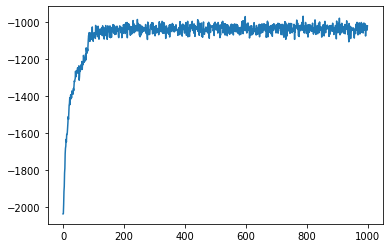

In [33]:
plt.plot(scores)
plt.show()